In [24]:
!pip install seaborn


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Faig el read CSV afegint una funció per a que totes les cel·les buides, amb valor N/A o amb guions es llegeixin com a No Disponible per evitar errors.
df = pd.read_csv('FastFoodNutritionMenuV2.csv', na_values=['', 'N/A', '-'])
# Selecciono la cel·la que conté el valor xa0 de la columna Calories i el marco com a que no es un número utilitant la llibreria Numpy nan
df['Calories'] = df['Calories'].replace('\xa0', np.nan)



In [8]:
# Resum estadístic del meu Dataset FastFood. Count fa un recompte dels valors no nuls de la columna, unique mostra el número de valors únics de la columna
# Top mostra el valor que apareix amb més freqüència i freq indica la freqüència del valor top.
df.describe()


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1148,1148,1147,642,1091,1091,1091,1147,1147,1091,1091,1147,1091,887
unique,6,1072,105,64,73,35,11,65,214,131,17,122,56,524
top,McDonald’s,29 fl oz,0,0,0,0,0,0,0,0,0,0,0,0
freq,329,11,83,175,357,383,954,378,54,75,551,190,314,67


In [6]:
# Mostra el número de files del meu Datase
len(df)

1148

In [4]:
# Mostra les 8 primeres línies
df.head(8)

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
5,McDonald’s,Double Quarter Pounder® with Cheese,740,380,42,19,2.5,155,1380,40,3,9,48,720
6,McDonald’s,Big Mac®,540,260,29,10,1.5,75,1040,45,3,9,25,534
7,McDonald’s,Big N’ Tasty®,460,220,24,8,1.5,70,720,37,3,8,24,452


In [15]:
# Funció per convertir la Columna Calories a valor númeric. Amb "coerce" el que es fa es donar-li un valor NaN (Not a Number) als valors que no han pogut ser convertits a numeros anteriorment.
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
# Després de pasar els valors restants a Not a Number, amb aquesta funció el que faig es eliminar aquest valors ja que no serveixen per res i també s'eviten errors.
df = df.dropna(subset=['Calories'])

In [16]:
# Amb mean faig una funció per calcular la mitjana de calories de cada Companyia. Li donare el not mitjana_calories.
mitjana_calories = df.groupby('Company')['Calories'].mean()


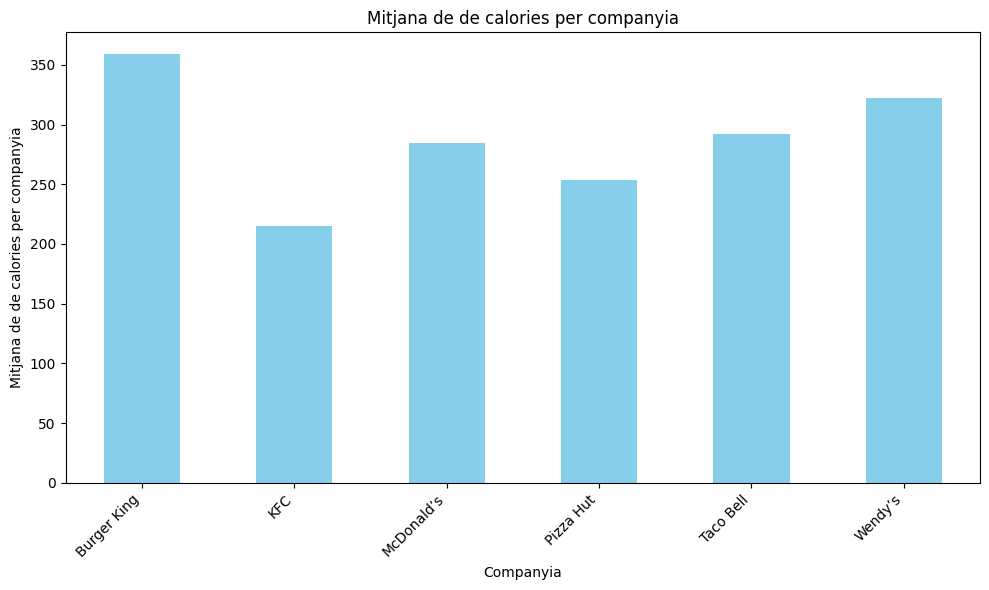

In [18]:
# Utilitzo la funció creada anteriorment per crear un gràfic de barres de color blau i amb tamany 10x6.
# Les funcions anterior per pasar els valors a números i borrar els que estan buits son vitals per a poder crear aquest gràfic.
plt.figure(figsize=(10, 6))
mitjana_calories.plot(kind='bar', color='skyblue')
plt.title('Mitjana de de calories per companyia')
plt.xlabel('Companyia')
plt.ylabel('Mitjana de de calories per companyia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Mostro el nom de les columnes per poder treballar sense errors. Pandas no permet utilitzar espais al fer gràfics.
# Tinc que treballar utilitzant els noms que es mostren abaix.
print(df.columns.tolist())


['Company', 'Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)', 'Weight Watchers\nPnts']


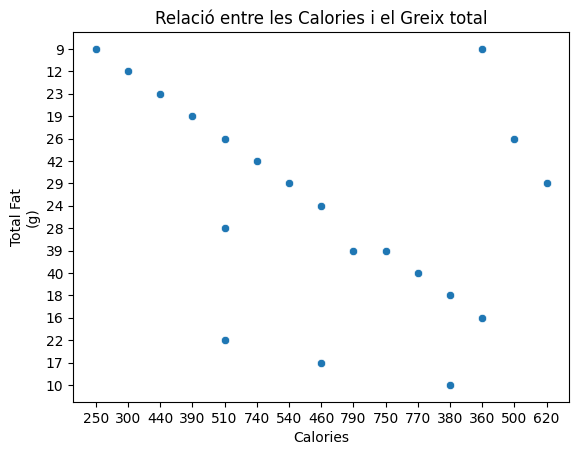

In [33]:
# Funció per fer un diagrama scatterplot el qual mostra la relació entre les calories i el greix total. 
# Com es pot observar, a mesura que augmenten les calories també puja el nivell de greix total pero també hi han desviacions.
# Això es degut a que al Dataset també hi han begudes, les quals tenen moltes calories pero menys greixos.
sns.scatterplot(x='Calories', y='Total Fat\n(g)', data=df.head(20))
plt.title('Relació entre les Calories i el Greix total')
plt.show()

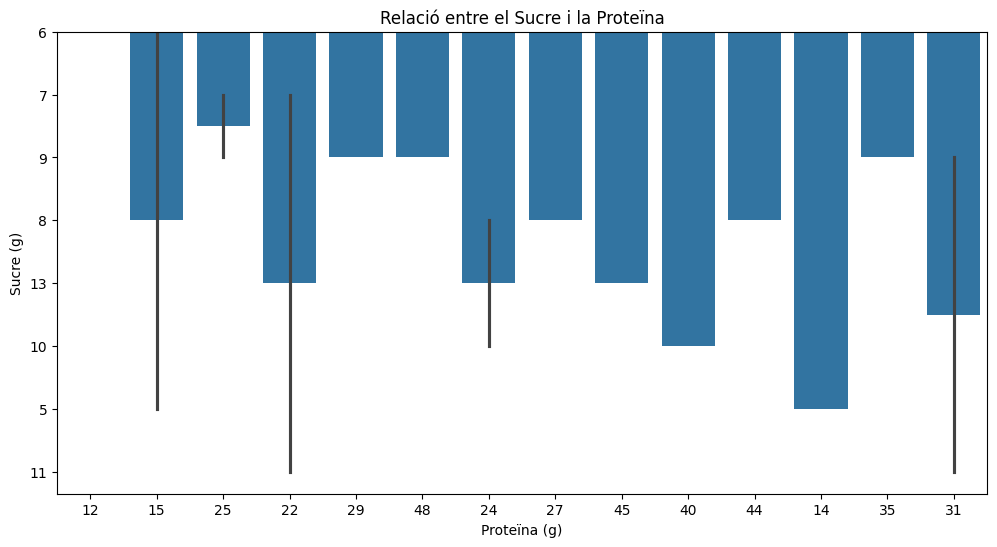

In [44]:
# Barplot per mostrar la relació entre el sucre i la proteïna.
# Com es pot observar, es una mica similar al scatterplot anterior però aquest te encara menys relació.
# Els valors no segueixen cap patró i com ja sabem, la Proteïna i el Sucre no tenen una gran relació.
plt.figure(figsize=(12, 6))
sns.barplot(x='Protein\n(g)', y='Sugars\n(g)', data=df.head(20))
plt.title('Relació entre el Sucre i la Proteïna')
plt.xlabel('Proteïna (g)')
plt.ylabel('Sucre (g)')
plt.show()

In [47]:
# Faig un count del número de vegades que surt la mateixa companyia a la columna Company
company_counts = df['Company'].value_counts()


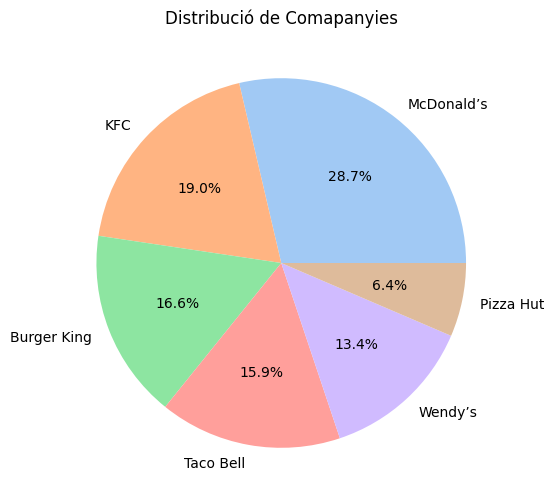

In [53]:
# Gràfic de pastís que mostra la distribució de les Comapnyies en quant al dataset FastFood.
# Tamany del gràfic 6
# Autopct mostra el percentatge de cada porció amb números decimals
# Com es pot observar, McDonald's ocupa quasi 1/3 de les Companyies
plt.figure(figsize=(6, 6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribució de Comapanyies')
plt.show()